In [188]:
import sys
import os
import cv2
import numpy as np
from IPython.display import Image as img_display

In [189]:
print('\ndetect_er_chars.py')
print('       A simple demo script using the Extremal Region Filter algorithm described in:')
print('       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012\n')


detect_er_chars.py
       A simple demo script using the Extremal Region Filter algorithm described in:
       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012



In [190]:
pathname='/notebooks/resources' #os.path.dirname(sys.argv[0])
file=pathname+'/'+'hw_pzlines.png'
#img_display(filename=file)

In [191]:
img = cv2.imread(file)#(str(sys.argv[1]))
gray= cv2.imread(file,0)#(str(sys.argv[1]),0)

In [192]:
# bightness
# value=255
# gray = np.where((255 - gray) > 0,0,255)
# for x in range(0, len(gray)):
#     for y in range(0, len(gray[x])):
#         if gray[x,y]<255:
#             gray[x, y]=0
#cv2.imwrite(pathname+"/brightness.png",gray)
#img_display(filename=pathname+"/brightness.png")
# invert color
#gray=cv2.bitwise_not(gray)
#cv2.imwrite(pathname+"/bitwise.png",gray)
#img_display(filename=pathname+"/bitwise.png")

In [193]:
# Apply dilation and erosion to remove some noise
# kernel =np.ones((1,1),np.uint8)
# gray=cv2.dilate(gray,kernel,iterations=1)
# gray=cv2.erode(gray,kernel,iterations=1)

# Write image after removed noise
#cv2.imwrite(pathname+"/removed_noise.png",gray)
# display in IPython
#img_display(filename=pathname+"/removed_noise.png")

In [194]:
# Apply threshold to get image with only black and white
#gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,1)

# Write the image after apply opencv to do some...
# cv2.imwrite(pathname+"/thres.png",gray)
# display in IPython
# img_display(filename=pathname+"/thres.png")

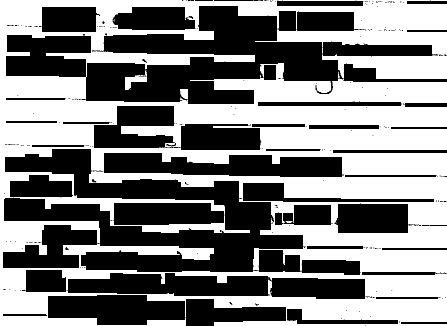

In [195]:
# mser = cv2.MSER_create(1,25,200)
mser = cv2.MSER_create(1,25,200,1)
regions,_ = mser.detectRegions(gray)
#hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
#cv2.polylines(img, hulls, 1, (0, 255, 0)) 
rects=[cv2.boundingRect(p.reshape(-1,1,2)) for p in regions]
for rect in rects:
    cv2.rectangle(gray,rect[0:2],(rect[0]+rect[2],rect[1]+rect[3]),(0,0,0),-1)
    
cv2.imwrite(pathname+"/filled.png",gray)
img_display(filename=pathname+"/filled.png")

In [196]:
mser = cv2.MSER_create(5,25,1000,0.5)
regions,_ = mser.detectRegions(gray)
rects=[cv2.boundingRect(p.reshape(-1,1,2)) for p in regions]
for rect in rects:
    cv2.rectangle(img,rect[0:2],(rect[0]+rect[2],rect[1]+rect[3]),(0,255,0),1)

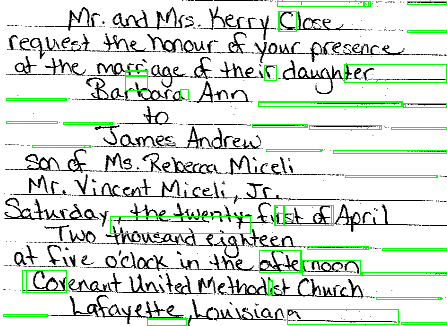

In [197]:
#cv2.imshow("Text detection result",img)
# cv2.waitKey(0)
cv2.imwrite(pathname+"/result.png",img)
img_display(filename=pathname+"/result.png")